# PHISHING_WEBSITE Prediction using Classification ML Techniques:

# Data_Reading:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('dataset_phishing.csv')

In [5]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


# Encoding:

In [6]:
df["status"].replace("legitimate",1, inplace = True)
df["status"].replace("phishing",0,inplace = True)
df["status"]

0        1
1        0
2        0
3        1
4        1
        ..
11425    1
11426    0
11427    1
11428    1
11429    0
Name: status, Length: 11430, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [8]:
#Replacing outliers with mean:

In [9]:
mean = df["domain_age"].mean()
df["domain_age"] = df["domain_age"].replace(-1,mean)

In [10]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,4062.543745,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767.000000,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004.000000,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,4062.543745,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175.000000,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396.000000,3980,0,0,6,1
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728.000000,0,0,1,0,0
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515.000000,8,0,1,10,1
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836.000000,2455493,0,0,4,1


In [11]:
df=df.drop('url',axis=1)      #Dropping attribute

In [188]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,4062.543745,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767.000000,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004.000000,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,4062.543745,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175.000000,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396.000000,3980,0,0,6,1
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728.000000,0,0,1,0,0
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515.000000,8,0,1,10,1
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836.000000,2455493,0,0,4,1


In [190]:
df.status.value_counts() #Perfectly BALANCED DATASET

1    5715
0    5715
Name: status, dtype: int64

# MODELING:

# Two features selected on basis of RFE:

In [191]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a base estimator
base_estimator = LogisticRegression()

# Perform RFE for feature selection
rfe = RFE(estimator=base_estimator, n_features_to_select=2)  # Select top-2 features
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['ratio_digits_url', 'ratio_digits_host'], dtype='object')


In [192]:
X=df[selected_feature_names]
y=df['status']

In [193]:
#Importing train_test_split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#70% data to be taken as training data and rest for testing to check accuracy
#Importing Logistic Regression from sklearn :
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
#Fitting:
model.fit(X_train,y_train)
X_prediction=model.predict(X_test)
model.score(X_test,y_test)
from sklearn.metrics import classification_report

report = classification_report(y_test,X_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.72      0.51      0.60      1697
           1       0.63      0.81      0.71      1732

    accuracy                           0.66      3429
   macro avg       0.67      0.66      0.65      3429
weighted avg       0.67      0.66      0.65      3429



# Basic-Model: Logistic Regression:

In [194]:
X=df.iloc[:,:87]
y=df['status']

In [195]:
X.shape

(11430, 87)

In [196]:
#Importing train_test_split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#70% data to be taken as training data and rest for testing to check accuracy

In [197]:
X_test.shape

(3429, 87)

In [198]:
#Importing Logistic Regression from sklearn :
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [199]:
#Fitting:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [200]:
X_prediction=model.predict(X_test)

In [203]:
from sklearn.metrics import classification_report

In [204]:
report = classification_report(y_test,X_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1697
           1       0.78      0.79      0.79      1732

    accuracy                           0.78      3429
   macro avg       0.78      0.78      0.78      3429
weighted avg       0.78      0.78      0.78      3429



In [205]:
model.intercept_

array([-0.00019749])

In [206]:
model.coef_

array([[-2.09401385e-02, -6.46336660e-03, -1.31122653e-04,
        -7.07334780e-04,  1.71380926e-04, -2.50520115e-05,
        -1.12722001e-04, -1.16318584e-04,  0.00000000e+00,
        -2.16199892e-04, -5.95385856e-05, -1.36406420e-06,
        -3.74574924e-05, -1.26436266e-03, -5.41840546e-07,
        -2.22471279e-04, -3.18333041e-06, -5.26100326e-05,
        -1.46864222e-06, -7.51497501e-07,  1.63041851e-04,
        -7.00434042e-05, -5.91105019e-06, -1.04056601e-05,
        -1.71839368e-04, -3.96091904e-05, -2.73103226e-05,
        -1.16556818e-07, -6.65815973e-07, -3.24252020e-05,
        -4.70100678e-05, -2.25314485e-05, -4.81204703e-04,
        -1.27517042e-04, -2.46663410e-05, -7.49038529e-05,
        -1.27793355e-07, -1.11324432e-04, -3.57176517e-06,
        -1.85156890e-03, -3.61066380e-04, -5.79159978e-04,
        -1.93014628e-03, -7.39695857e-04, -6.34381919e-03,
        -2.61071082e-03, -5.77506915e-03, -1.98581904e-03,
        -2.19719287e-03, -2.17509517e-03, -3.55601499e-0

# Feature Selection using RFE:

In [207]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [208]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [209]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('length_url', False, 10),
 ('length_hostname', True, 1),
 ('ip', True, 1),
 ('nb_dots', True, 1),
 ('nb_hyphens', True, 1),
 ('nb_at', True, 1),
 ('nb_qm', True, 1),
 ('nb_and', False, 23),
 ('nb_or', False, 40),
 ('nb_eq', False, 2),
 ('nb_underscore', True, 1),
 ('nb_tilde', False, 28),
 ('nb_percent', False, 6),
 ('nb_slash', True, 1),
 ('nb_star', False, 36),
 ('nb_colon', True, 1),
 ('nb_comma', False, 34),
 ('nb_semicolumn', True, 1),
 ('nb_dollar', False, 29),
 ('nb_space', True, 1),
 ('nb_www', True, 1),
 ('nb_com', True, 1),
 ('nb_dslash', False, 24),
 ('http_in_path', False, 32),
 ('https_token', True, 1),
 ('ratio_digits_url', True, 1),
 ('ratio_digits_host', True, 1),
 ('punycode', False, 38),
 ('port', False, 30),
 ('tld_in_path', False, 17),
 ('tld_in_subdomain', True, 1),
 ('abnormal_subdomain', True, 1),
 ('nb_subdomains', True, 1),
 ('prefix_suffix', True, 1),
 ('random_domain', True, 1),
 ('shortening_service', True, 1),
 ('path_extension', False, 37),
 ('nb_redirec

In [210]:
X_train.columns[rfe.support_]

Index(['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm',
       'nb_underscore', 'nb_slash', 'nb_colon', 'nb_semicolumn', 'nb_space',
       'nb_www', 'nb_com', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'phish_hints', 'domain_in_brand',
       'suspecious_tld', 'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extErrors',
       'external_favicon', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'dns_record', 'google_index', 'page_rank'],
      dtype='object')

In [211]:
X_test.columns[rfe.support_]

Index(['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm',
       'nb_underscore', 'nb_slash', 'nb_colon', 'nb_semicolumn', 'nb_space',
       'nb_www', 'nb_com', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'phish_hints', 'domain_in_brand',
       'suspecious_tld', 'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extErrors',
       'external_favicon', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'dns_record', 'google_index', 'page_rank'],
      dtype='object')

In [212]:
X_train = X_train[X_train.columns[rfe.support_]]
X_test=X_test[X_test.columns[rfe.support_]]

In [213]:
X_train.shape

(8001, 43)

# MODEL 1: LOGISTIC MODEL:

In [214]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [215]:
X_prediction=model.predict(X_test)

In [216]:
from sklearn.metrics import classification_report
report = classification_report(y_test,X_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1697
           1       0.94      0.95      0.94      1732

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



# MODEL 2:NAIVE BAYES CLASSIFIER:

In [217]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the classifier to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes.predict(X_test)

# Obtain the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.94      0.54      0.68      1697
           1       0.68      0.96      0.80      1732

    accuracy                           0.75      3429
   macro avg       0.81      0.75      0.74      3429
weighted avg       0.81      0.75      0.74      3429



# MODEL 3:Simple Decision Tree After RFE:

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier(max_depth=5, min_samples_split=150, min_samples_leaf=250)

In [219]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=250, min_samples_split=150)

[Text(0.4375, 0.9166666666666666, 'X[41] <= 0.5\ngini = 0.5\nsamples = 8001\nvalue = [4018, 3983]'),
 Text(0.16666666666666666, 0.75, 'X[42] <= 1.5\ngini = 0.199\nsamples = 3724\nvalue = [417, 3307]'),
 Text(0.125, 0.5833333333333334, 'gini = 0.498\nsamples = 339\nvalue = [179, 160]'),
 Text(0.20833333333333334, 0.5833333333333334, 'X[27] <= 12.5\ngini = 0.131\nsamples = 3385\nvalue = [238, 3147]'),
 Text(0.16666666666666666, 0.4166666666666667, 'X[11] <= 0.5\ngini = 0.092\nsamples = 3126\nvalue = [151, 2975]'),
 Text(0.08333333333333333, 0.25, 'X[42] <= 3.5\ngini = 0.199\nsamples = 1059\nvalue = [119, 940]'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.375\nsamples = 252\nvalue = [63, 189]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.129\nsamples = 807\nvalue = [56, 751]'),
 Text(0.25, 0.25, 'X[27] <= 0.5\ngini = 0.03\nsamples = 2067\nvalue = [32, 2035]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.004\nsamples = 988\nvalue = [2, 986]'),
 Text(0.2916666

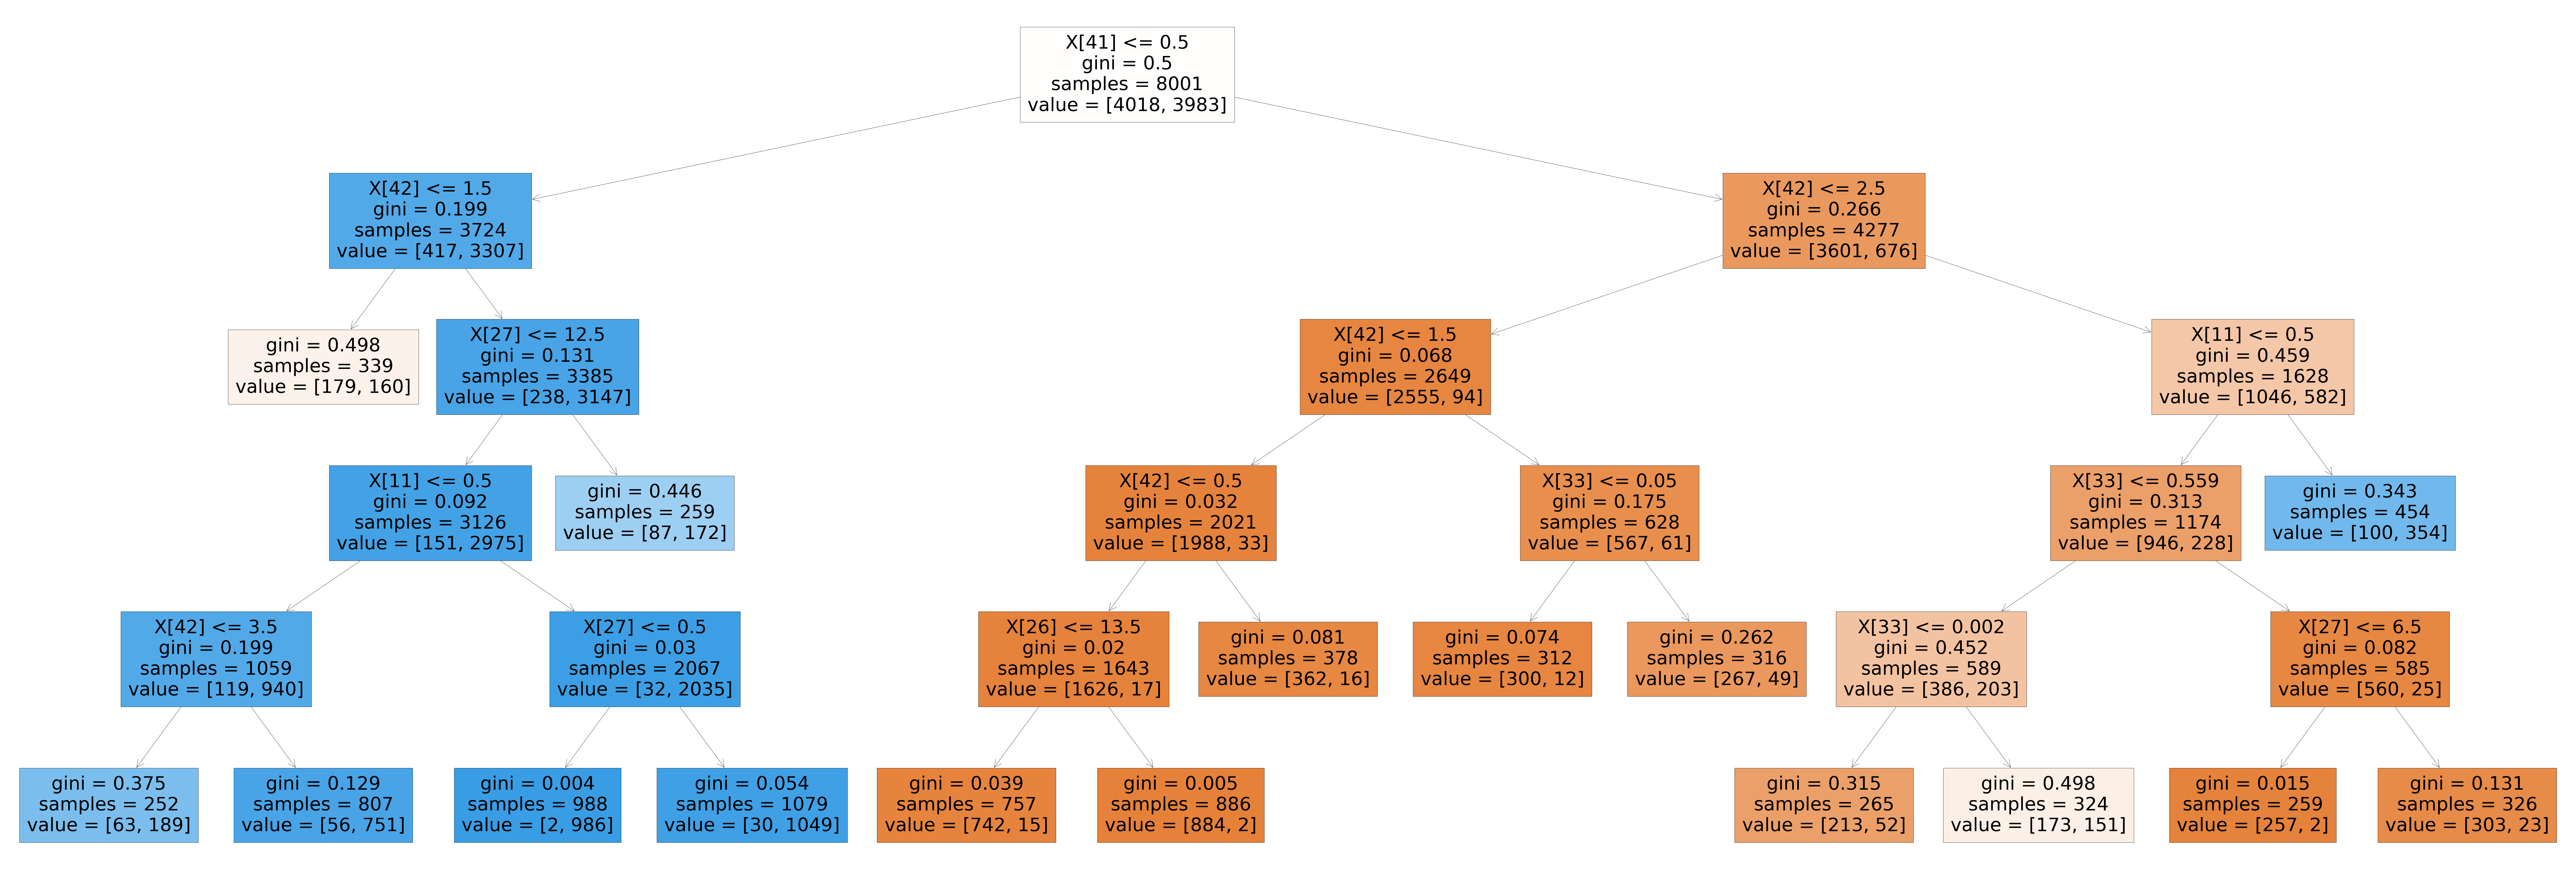

In [220]:
plt.figure(figsize=(200,70))
tree.plot_tree(classifier,filled=True)

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the decision tree to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1697
           1       0.94      0.94      0.94      1732

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



# MODEL 4:Random Forest After RFE with 60 DT:

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a random forest classifier with 10 decision trees
random_forest = RandomForestClassifier(n_estimators=60)

# Fit the random forest to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Obtain the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1697
           1       0.97      0.96      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.96      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



# MODEL 5: XGBOOST with 60 Decision Trees:

In [224]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier with 60 decision trees
xgb_classifier = xgb.XGBClassifier(n_estimators=60, random_state=42)

# Fit the XGBoost classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1697
           1       0.97      0.98      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



# MODEL 6:ADABOOST with 60 DT:

In [225]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an AdaBoost classifier with 60 decision trees
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=60, random_state=42)

# Fit the AdaBoost classifier to the training data
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1697
           1       0.95      0.96      0.96      1732

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



# MODEL 7:Support Vector Machine:

In [226]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an SVM classifier
svm = SVC()

# Fit the SVM classifier to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1697
           1       0.92      0.93      0.93      1732

    accuracy                           0.92      3429
   macro avg       0.92      0.92      0.92      3429
weighted avg       0.92      0.92      0.92      3429

